# Efficient Graph Based Image Segmentation (Code)

Here, we are trying to implement the algorithm proposed in [Efficient Graph-Based Image Segmentation](http://cs.brown.edu/%7Epff/segment)
which was developed by Felzenszald et al. in 2003.

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.signal import convolve2d



When the libraries are ready, we are going to open the image which will be used for the segmentation.
The image are in the dataset folder (you may find 2) the vis.jpg is a visible image, and vis_nir.jpg is an image captured with a single sensor camera (it contains visible and near infrared spectrums)

(256, 256)


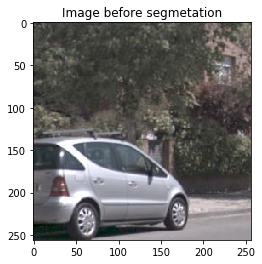

In [32]:
%matplotlib inline
img_name = 'dataset/vis.jpg'  # 'dataset/vis_nir.jpg'
img = Image.open(img_name)
img.load()
plt.title("Image before segmetation")
plt.imshow(img)
plt.draw()
print (img.size)

According to Graph-Based Segmentation we need to make a Graph however, before such a step it is necessary to split the image channels and make a convolution (with gaussina filter) to each channels, Therefore, and for the purpose of the algorithm implementation it is necessary to define some parameters:
**kernel**, **sigma**, etc.

**Kernel:** 
**Sigma:**

**Image size:** the image used is 256x256x3 (width x heigth, depth)


In [54]:
neighbor = 10
sigma = 0.5
kernel = 5
min_size = 256
img_size = img.size


Bellow you could find two function gaussian_filter and img_convolution. The first one is to make a grid which will contain the gaussian distribution to suddenly apply img_convolution to each channel.

In [55]:
def gaussian_filter(kernel_size, sigma):
    mi = (np.int(np.float(kernel_size)/2))
    ma = mi+1
    x,y = np.mgrid[-mi:ma,-mi:ma]
    g_filter = np.exp(mi**2) * np.exp(-0.5*(x**2 + y **2))
    return g_filter/g_filter.sum(), x, y
    
    
# image convolution
def img_convolution(channel, gaussian_kernel):
    channel = convolve2d(channel,gaussian_kernel, mode='same')
    return channel

kernel before process:
[[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]
2


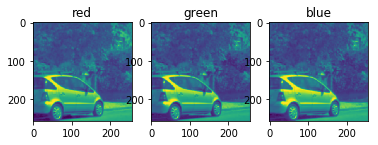

In [57]:

r,g,b = img.split()
r = np.float32(np.asarray(r)) 
g = np.float32(np.asarray(g)) 
b = np.float32(np.asarray(b)) 
gaussian_kernel, x, y = gaussian_filter(kernel, sigma)

r = img_convolution(r,gaussian_kernel)
g = img_convolution(g, gaussian_kernel)
b = img_convolution(b,gaussian_kernel)

print("kernel before process:")
print(x)
print(y)

fig = plt.figure()
sub_fig = fig.add_subplot(1,3,1)
img_plot = plt.imshow(r)
sub_fig.set_title('red')
sub_fig = fig.add_subplot(1,3,2)
img_plot = plt.imshow(g)
sub_fig.set_title('green')
sub_fig = fig.add_subplot(1,3,3)
img_plot = plt.imshow(b)
sub_fig.set_title('blue')
plt.draw()

